# Розпізнавання об'єктів на зображеннях з набору даних CIFAR-10

## prapare data

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
from keras import regularizers
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Розмір міні-вибірки
batch_size = 128
# Кількість класів зображень
nb_classes = 10
# Кількість епох для навчання
nb_epoch = 100
# Розмір зображеннь
img_rows, img_cols = 32, 32
# Кількість каналів в зображенні 
img_channels = 3
# Назви класівз набору даних  CIFAR-10
classes=['літак', 'автомобіль', 'птиця', 'кіт', 'олень', 'собака', 'жаба', 'кінь', 'корабель', 'вантажівка']

## Підготовка даних

**Завантажуємо дані**

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


**Перагляд прикладів даних**

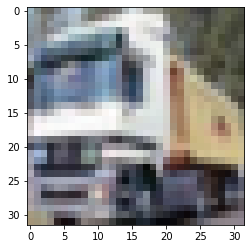

Номер класу: [9]
Тип об'єкту: вантажівка


In [4]:
n = 1
plt.imshow(X_train[n])
plt.show()
print("Номер класу:", y_train[n])
print("Тип об'єкту:", classes[y_train[n][0]])

**Нормалізуємо  дані**

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Перетворюємо вірні відповіді в формат one hot encoding**

In [6]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Створюємо нейронну мережу

In [7]:
# Створюємо послідовну модель
model = Sequential()

# First Conv layer
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Second Conv layer
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Third, fourth, fifth convolution layer
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Fully Connected layers
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

**Друкуємо інформацію щодо мережі**

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)         0

**Компілюємо модель**

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0003, decay=1e-6),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Навчаємо нейрону мережу

In [ ]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/100
352/352 - 16s - loss: 2.2051 - accuracy: 0.1838 - val_loss: 1.8512 - val_accuracy: 0.3134 - 16s/epoch - 45ms/step
Epoch 2/100
352/352 - 15s - loss: 1.7492 - accuracy: 0.3510 - val_loss: 1.4490 - val_accuracy: 0.4880 - 15s/epoch - 41ms/step
Epoch 3/100
352/352 - 15s - loss: 1.4695 - accuracy: 0.4811 - val_loss: 1.1871 - val_accuracy: 0.5868 - 15s/epoch - 42ms/step
Epoch 4/100
352/352 - 15s - loss: 1.2716 - accuracy: 0.5628 - val_loss: 1.0504 - val_accuracy: 0.6356 - 15s/epoch - 42ms/step
Epoch 5/100
352/352 - 15s - loss: 1.1442 - accuracy: 0.6178 - val_loss: 0.9255 - val_accuracy: 0.6890 - 15s/epoch - 42ms/step
Epoch 6/100
352/352 - 15s - loss: 1.0486 - accuracy: 0.6561 - val_loss: 0.9398 - val_accuracy: 0.6882 - 15s/epoch - 42ms/step
Epoch 7/100
352/352 - 15s - loss: 0.9630 - accuracy: 0.6885 - val_loss: 0.8158 - val_accuracy: 0.7296 - 15s/epoch - 42ms/step
Epoch 8/100
352/352 - 15s - loss: 0.9064 - accuracy: 0.7107 - val_loss: 0.8101 - val_accuracy: 0.7440 - 15s/epoch - 42

## Оцінюємо якість  навчання мережі

In [ ]:
# Оцінюємо якість навчання моделі на тестових даних 
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точність роботи на тестових даних: %.2f%%" % (scores[1]*100))

Точність роботи на тестових даних: 82.26%


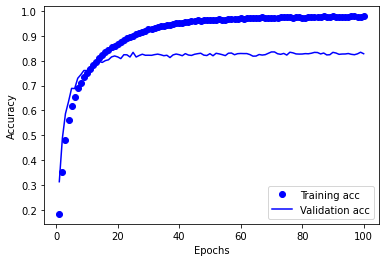

In [ ]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Зберігаємо навчену нейрону мережу

In [ ]:
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model1.h5")

In [ ]:
!ls

cifar10_model1.h5  cifar10_model.json  sample_data


In [ ]:
from google.colab import files

In [ ]:
files.download("cifar10_model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("cifar10_model1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Завантажуємо попередньо навчену нейронну мережу 


Завантажуємо файл з навченою моделлю 

In [ ]:
#!wget https://github.com/Kolyanuss/Lab_Univer/blob/master/Lab_4k_1sem/Recognise/lab4/cifar10_model1.h5
f = files.upload()


Завантажуємо модель в пам'ять 

In [ ]:
model = load_model('fashion_mnist_dense.h5')

In [ ]:
model.json

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 300)               300300    
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 1,088,310
Trainable params: 1,088,310
Non-trainable params: 0
_________________________________________________________________


## Застосовуємо мережу для розпізнавання об'єктів на зображеннях 

**Перегляд зображення з набору даних для тестування**

In [ ]:
index=22
plt.imshow(X_test[index])
plt.show()

**Перетворення тестового зображення**

In [ ]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

**Запуск распізнавання**

In [ ]:
prediction = model.predict(x)

**Друкуємо результати розпізнавання**

In [ ]:
print(prediction)

**Перетворюємо результати з формату one hot encoding**

In [ ]:
prediction = np.argmax(prediction)
print(classes[prediction])

**Друкуємо вірну відповідь**

In [ ]:
print(classes[y_test[index][0]])

## Розпізнаємо додаткове зображення

In [ ]:
files.upload()

Перевіряємо завантаження файлів

In [ ]:
!ls

**Дивимось завантажений малюнок**

In [ ]:
img_path = 'вантажівка2.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

**Перетворюємо малюнок в масив для розпізнавання**

In [ ]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

**Запускаємо розпізнавання**

In [ ]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])